# Project Deliverable 3
## Team Members


1.   (**1212312**) **PRIYAMVADA MURUDKAR**
2.   (**1226988**) **ASHUN MITESHBHAI KOTHARI**


## Dataset
Loan Approval Dataset used- https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

## Overview
Features extraction and engineering have been applied to improve the accuracy of the model. The supervised classification algorithm used is RandomForest.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import xgboost
xgboost.set_config(verbosity=0) # to avoid XGB warning

%matplotlib inline
sns.set_style('darkgrid')
sns.set()
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# Helper functions

In [2]:
def predict_using_model(classifier, train_x, train_y, test_x, test_y):
    """Evaluating performance of a model using the training and testing data"""
    print("-"*90)
    print(f"{classifier.__class__.__name__}: Training classifier....")
    classifier.fit(train_x, train_y)
    training_score = cross_val_score(classifier, train_x, train_y, cv=5)
    print(f"{classifier.__class__.__name__}: has a training score of {round(training_score.mean()* 100, 2)}%")
    print(f"{classifier.__class__.__name__} Testing classifier...")
    model_predictions = classifier.predict(test_x)
    accuracy = accuracy_score(test_y, model_predictions)

    fpr, tpr, thresholds_roc = roc_curve(test_y, model_predictions)
    roc_auc = auc(fpr, tpr)
    print(f"{classifier.__class__.__name__}: Area Under the Receiver Operating Characteristic: {round(roc_auc, 4)}")

    precision, recall, thresholds_pr = precision_recall_curve(test_y, model_predictions)
    pr_auc = auc(recall, precision)
    print(f"{classifier.__class__.__name__}: Area Under the Precision-Recall : {round(pr_auc, 4)}")
    print(f"{classifier.__class__.__name__}: {classifier.__class__.__name__} has Accuracy : {round(accuracy.mean()*100, 2)}%")
    print("-"*90)
    return model_predictions, accuracy, training_score, roc_auc, pr_auc

In [3]:
def clean_data(df):
  df.drop('loan_id', axis=1, inplace=True)
  df.columns = df.columns.str.replace(' ', '')
  for column in df.columns:
    if df[column].dtype != np.int64:
      df[column] = df[column].str.strip()

def describe_dataset(df):
  print("Top five rows from dataset:")
  print(df.head())
  print("-"*90)
  print(f"Shape of the dataset: {df.shape}")
  print("-"*90)
  print("Dataset High level Info:")
  print(df.info())
  print("-"*90)
  df.columns.str.replace(' ', '')

In [4]:
import requests

def download_dataset():
  dataset_link = "https://raw.githubusercontent.com/rogue-gamer-ryt/loan-approval-prediction/main/loan_approval_dataset.csv"

  res = requests.get(dataset_link)
  filename = "loan_approval_dataset.csv"

  with open(filename, "wb") as f_out:
    print(f"Downloading {filename}")
    f_out.write(res.content)
  print("File downloaded")

# Driver Code

## Download Datasest

In [5]:
download_dataset()

File downloaded


## Load and clean data

In [6]:

loan_dataset = pd.read_csv('loan_approval_dataset.csv')
clean_data(loan_dataset)
describe_dataset(loan_dataset)

Top five rows from dataset:
   no_of_dependents     education self_employed  income_annum  loan_amount  \
0                 2      Graduate            No       9600000     29900000   
1                 0  Not Graduate           Yes       4100000     12200000   
2                 3      Graduate            No       9100000     29700000   
3                 3      Graduate            No       8200000     30700000   
4                 5  Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value

In [7]:
loan_dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Analysis

In [8]:
# Check approval and rejection count
loan_dataset['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [9]:
# Let's normalize and check the proportion
loan_dataset['loan_status'].value_counts(normalize=True)

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

In [10]:
approval_count, rejection_count = loan_dataset['loan_status'].value_counts()
total_count = approval_count + rejection_count
approval_rate = round((approval_count/total_count) * 100, 2)
rejection_rate = round((rejection_count/total_count)  * 100, 2)
print(f"Loan Approval Rate: {approval_rate}%")
print(f"Loan Rejection Rate: {rejection_rate}%")

Loan Approval Rate: 62.22%
Loan Rejection Rate: 37.78%


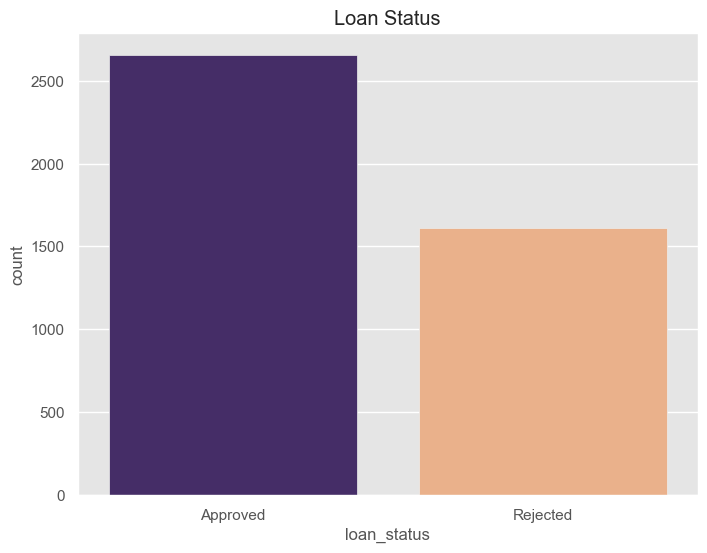

In [11]:
# Graphical representation of the loan status data
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', data=loan_dataset, palette=['#432371',"#FAAE7B"])
plt.title('Loan Status')
plt.show()

Lets take a look at the various type of data present in our dataset. We got Categorical and Numeric data


* **Categorical**: Columns like education, Self-employed provides just categorical data
* **Numerical**: Loan Amount, income columns have numerical data in them


Based on the graph above approx 62.22% of the loans were accepted having a count of more than 2500 whereas 37.78% of loans were rejected

In [12]:
categorical_features=["education", "self_employed", "loan_status", "no_of_dependents", "loan_term"]
numerical_features = ['income_annum', 'loan_amount', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

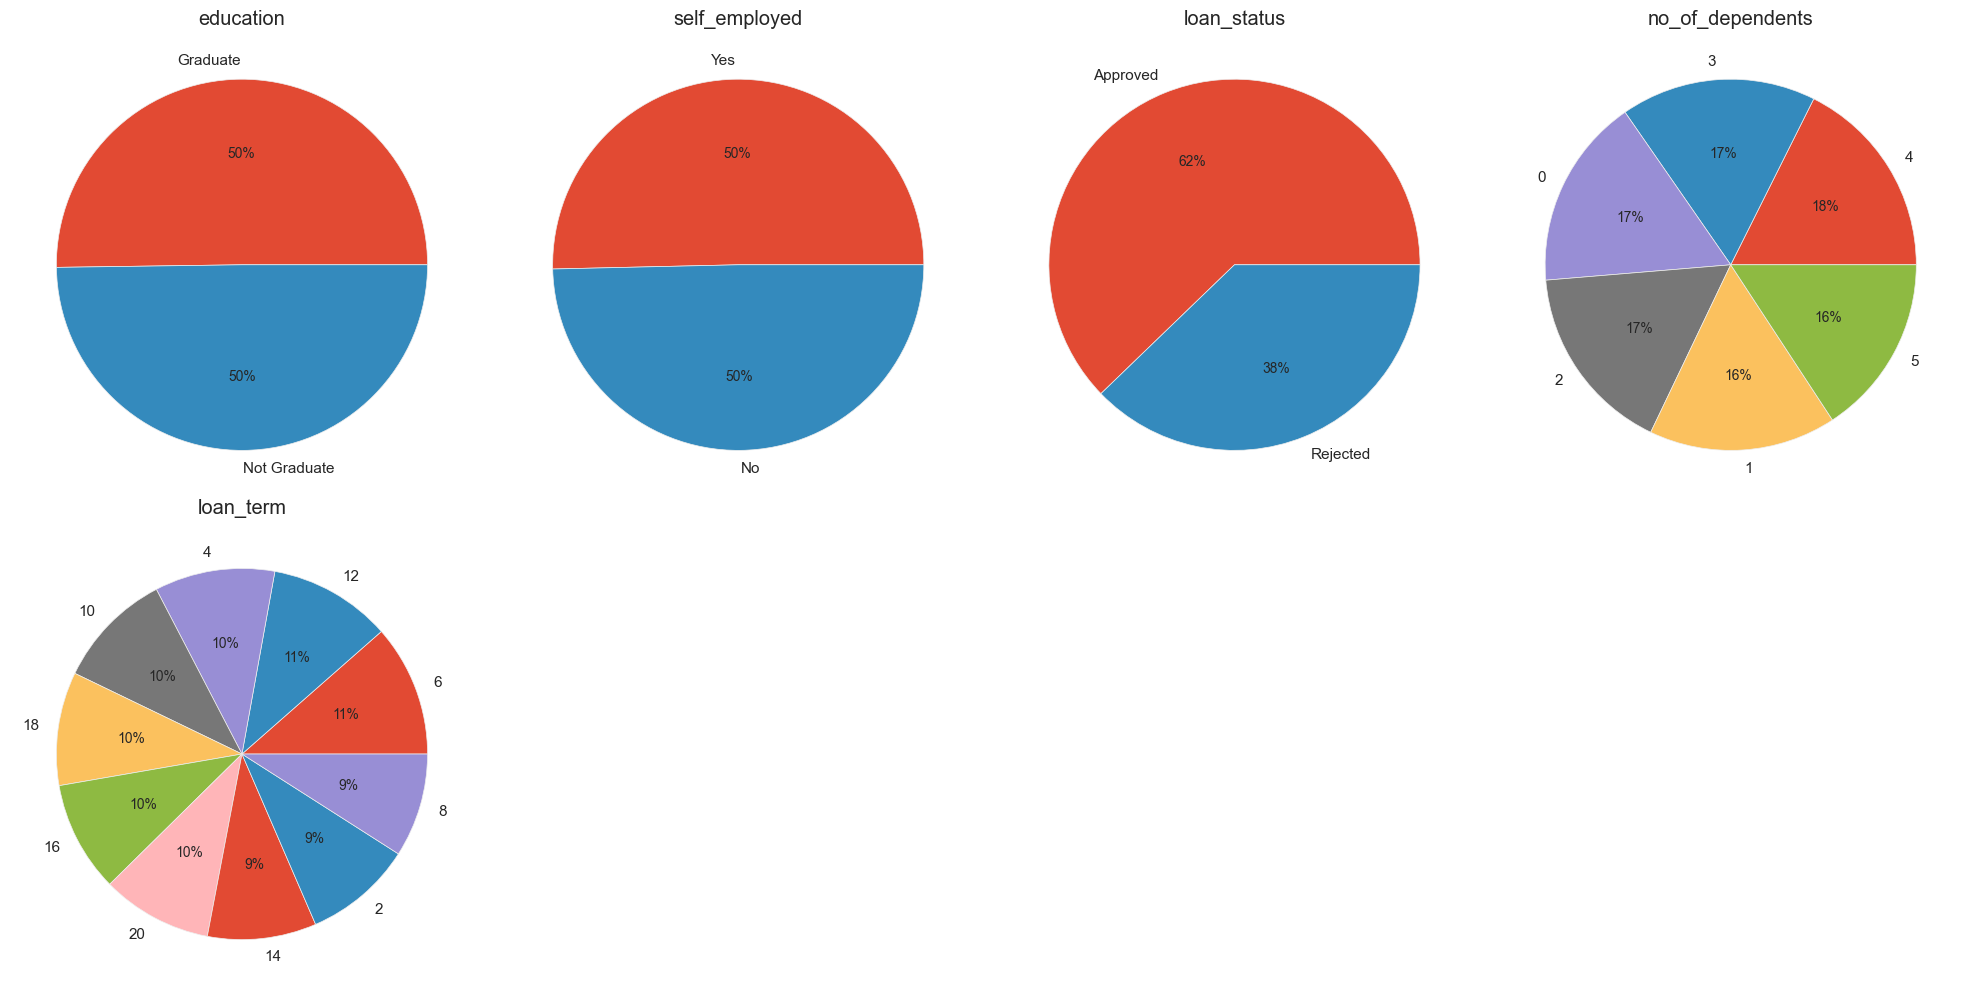

In [13]:

# Overall Categorical data distribution
plt.figure(figsize=(20,10), layout="tight")
for index, col in enumerate(categorical_features, start=1):
    plt.subplot(2,4,index)
    plt.title(col)
    plt.pie(loan_dataset[col].value_counts().values,autopct='%1.0f%%', labels=loan_dataset[col].value_counts().index)
plt.tight_layout()

The above pie charts shows equal distribution among the "education" and "self_employed" dataset features.

In "loan_status" feature the approved value has higher percentage than the rejected ones.

"No. of Dependents" feature lies in the range of 16% to 18% having 17% as the highest for 0,2 and 3 dependent values.

"Loan Term" feature having maximum 10% percentage holds loan approval terms as 4,16,18 and 20 years.

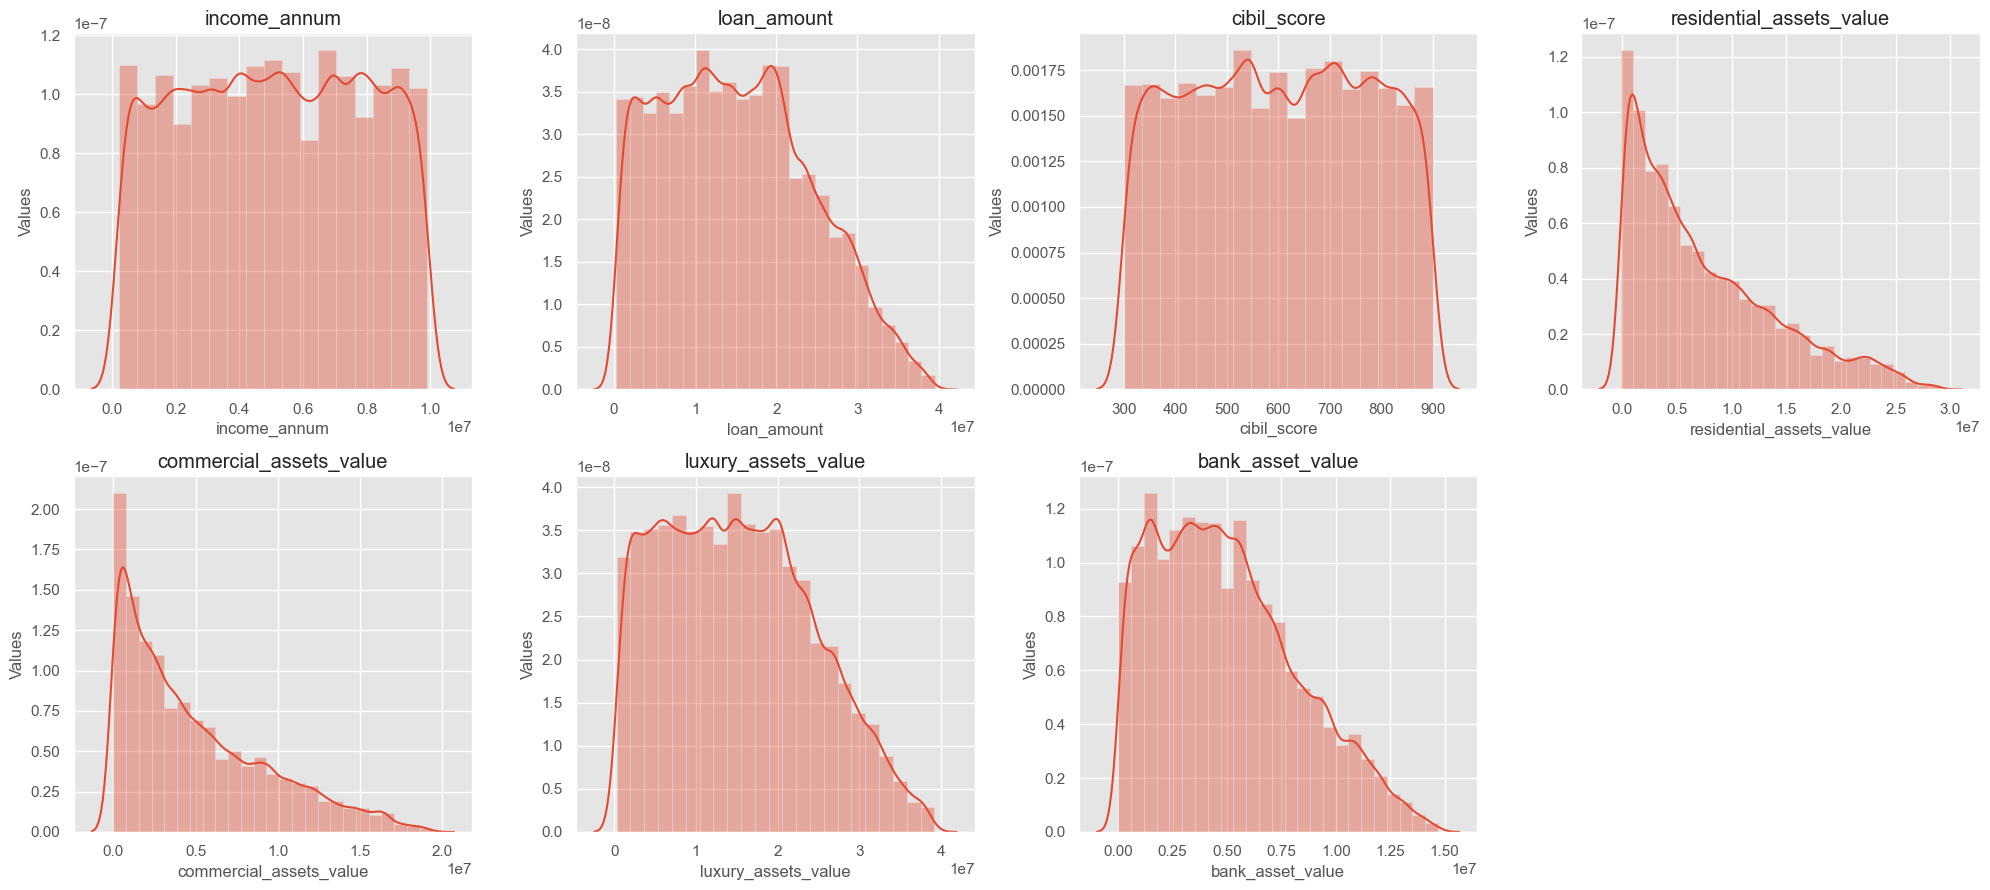

In [14]:
# Overall Contineous Data Distribution(ideally, should be normal/gaussian distributed)
plt.figure(figsize=(20,9), layout="tight")
for index, col in enumerate(numerical_features, start=1):
    plt.subplot(2,4,index)
    plt.title(col)
    plt.xlabel('Range')
    plt.ylabel('Values')
    sns.distplot(loan_dataset[col], kde_kws={'bw':0.1})

As we can see the numerical data is skewed towards the left for commercial asset value, luxury asset value and residence asset value

We will have to normalize this distribution

In [15]:
# Converting the categorical data into integer values
oe = OrdinalEncoder()
for col in categorical_features:
  loan_dataset[col] = oe.fit_transform(loan_dataset[col].values.reshape(-1,1))

loan_dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,0.0,0.0,9600000,29900000,5.0,778,2400000,17600000,22700000,8000000,0.0
1,0.0,1.0,1.0,4100000,12200000,3.0,417,2700000,2200000,8800000,3300000,1.0
2,3.0,0.0,0.0,9100000,29700000,9.0,506,7100000,4500000,33300000,12800000,1.0
3,3.0,0.0,0.0,8200000,30700000,3.0,467,18200000,3300000,23300000,7900000,1.0
4,5.0,1.0,1.0,9800000,24200000,9.0,382,12400000,8200000,29400000,5000000,1.0


Lets get pairwise correlation for each column to help us with feature extraction

<Axes: >

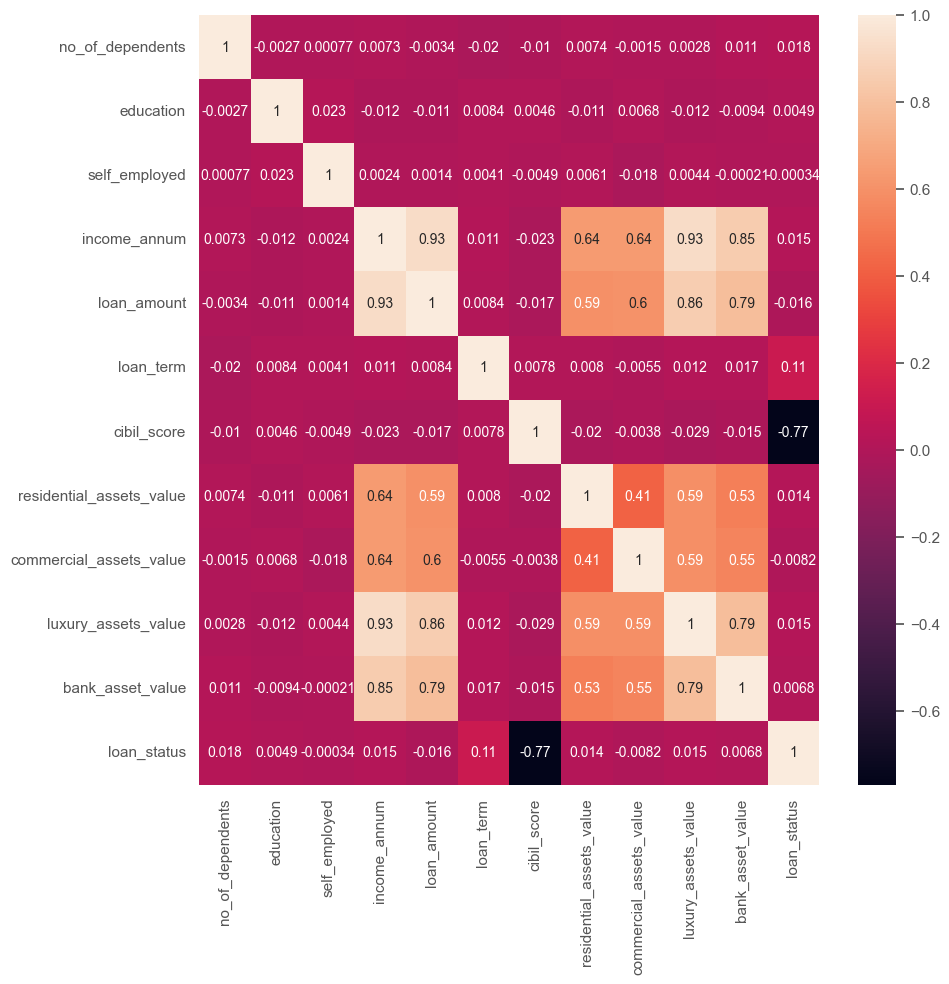

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(loan_dataset.corr(), annot = True)

## Feature Selection

In [17]:
# Remove columns that have low correlation
X = loan_dataset[['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'luxury_assets_value']]
Y = loan_dataset[["loan_status"]]


## Normalize Data

In [18]:
# Calculate the IQR for the 'Values' column
Q1 = loan_dataset['loan_amount'].quantile(0.1)
Q3 = loan_dataset['loan_amount'].quantile(0.9)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

# Identify outliers
outliers = loan_dataset[(loan_dataset['loan_amount'] < lower_bound) | (loan_dataset['loan_amount'] > upper_bound)]

print("Outliers:")
print(outliers)
print(outliers.shape)

Outliers:
Empty DataFrame
Columns: [no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
(0, 12)


In [19]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [20]:
print(X)

[[0.4        0.96907216 0.75510204 ... 0.79666667 0.08561644 0.57583548]
 [0.         0.40206186 0.30357143 ... 0.195      0.09589041 0.218509  ]
 [0.6        0.91752577 0.75       ... 0.34333333 0.24657534 0.84832905]
 ...
 [0.4        0.64948454 0.60204082 ... 0.26166667 0.04452055 0.45758355]
 [0.2        0.40206186 0.31887755 ... 0.8        0.28424658 0.35475578]
 [0.2        0.92783505 0.75       ... 0.51166667 0.6130137  0.91002571]]


## Spliting Data

In [21]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Running multiple classification algorithm to evaluate and compare results

In [22]:
# creating dictionary of all classifier
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'SUpport Vector Classifier': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'SGDClassifier': SGDClassifier(),
    'XGBClassifier': XGBClassifier()
}

In [23]:


# Create a table
table = PrettyTable()
from prettytable import MARKDOWN 
table.set_style(MARKDOWN )

# Define the table columns
table.field_names = ["Model", "Training Score", "Accuracy", "AUC-ROC", "AUC-PR"]


final_predictions = {}

for key, c in classifiers.items():
    model_predictions, accuracy, training_score, roc_auc, pr_auc = predict_using_model(c, train_x, train_y, test_x, test_y)
    final_predictions[c.__class__.__name__] = model_predictions
    table.add_row([c.__class__.__name__, f"{round(training_score.mean()* 100, 2)}%", f"{round(accuracy.mean()*100, 2)}%", f"{round(roc_auc, 4)}", f"{round(pr_auc, 4)}"])

print(table)

------------------------------------------------------------------------------------------
LogisticRegression: Training classifier....
LogisticRegression: has a training score of 91.33%
LogisticRegression Testing classifier...
LogisticRegression: Area Under the Receiver Operating Characteristic: 0.919
LogisticRegression: Area Under the Precision-Recall : 0.9213
LogisticRegression: LogisticRegression has Accuracy : 92.39%
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
SVC: Training classifier....
SVC: has a training score of 94.82%
SVC Testing classifier...
SVC: Area Under the Receiver Operating Characteristic: 0.9546
SVC: Area Under the Precision-Recall : 0.9547
SVC: SVC has Accuracy : 95.67%
------------------------------------------------------------------------------------------
------------------------------------------------------------------------

## Plotting the Confusion matrix for each classifier

LogisticRegression: Plotting the Confusion Matrix


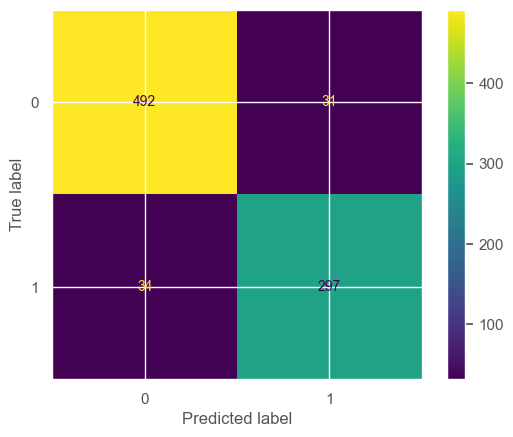

SVC: Plotting the Confusion Matrix


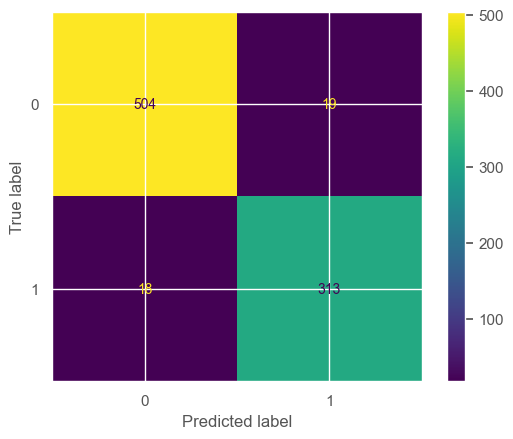

KNeighborsClassifier: Plotting the Confusion Matrix


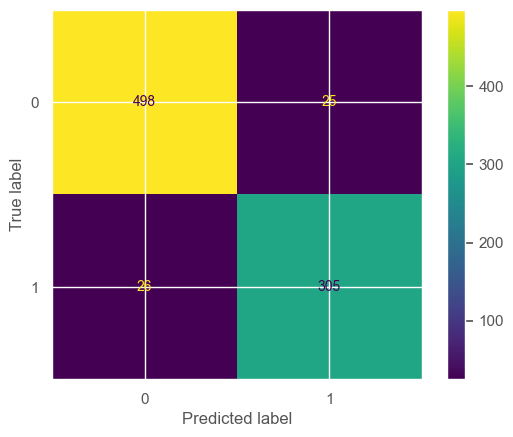

DecisionTreeClassifier: Plotting the Confusion Matrix


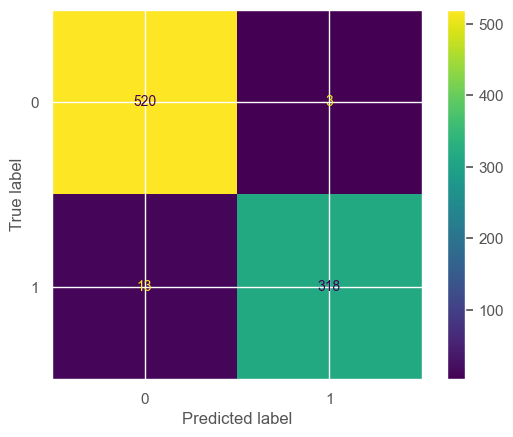

RandomForestClassifier: Plotting the Confusion Matrix


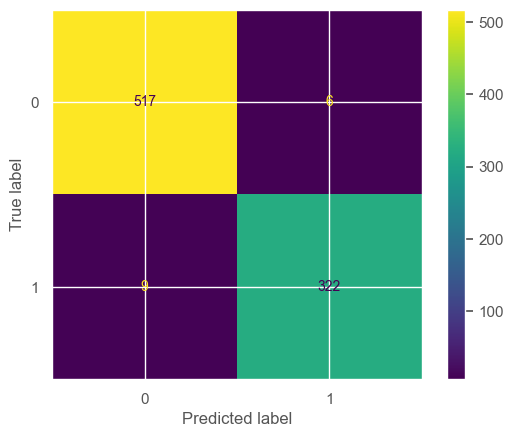

AdaBoostClassifier: Plotting the Confusion Matrix


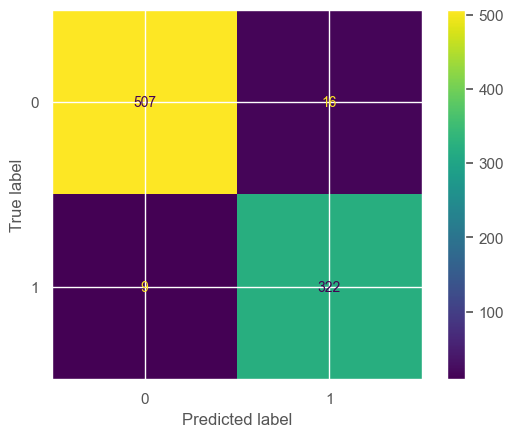

SGDClassifier: Plotting the Confusion Matrix


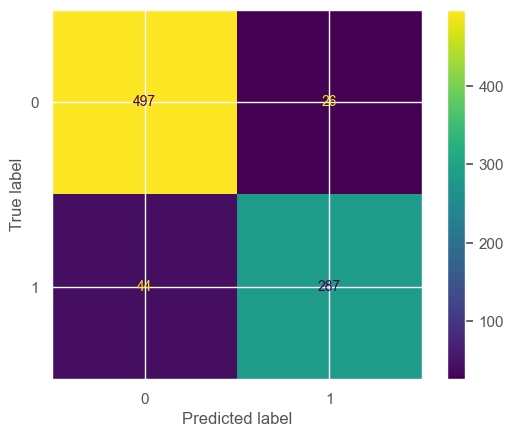

XGBClassifier: Plotting the Confusion Matrix


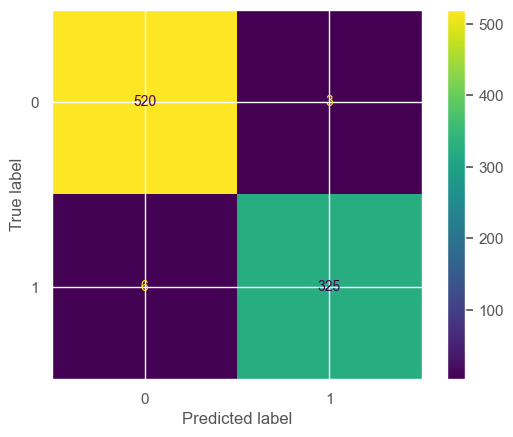

In [24]:

for classifier, predictions in final_predictions.items():
  print(f"{classifier}: Plotting the Confusion Matrix")
  ConfusionMatrixDisplay(confusion_matrix(test_y, predictions)).plot()
  plt.show()

# Hyperparameter tuning the RandomForest Classifier using RandomizedSearchCV

In [25]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=100,
    scoring='accuracy', cv=5, verbose=2, random_state=42, n_jobs=-1
)

# Fit the model
random_search.fit(train_x, train_y)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", random_search.best_params_)
rf_classifier = RandomForestClassifier(**random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Best Parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


------------------------------------------------------------------------------------------
RandomForestClassifier: Training classifier....
RandomForestClassifier: has a training score of 98.27%
RandomForestClassifier Testing classifier...
RandomForestClassifier: Area Under the Receiver Operating Characteristic: 0.9827
RandomForestClassifier: Area Under the Precision-Recall : 0.983
RandomForestClassifier: RandomForestClassifier has Accuracy : 98.36%
------------------------------------------------------------------------------------------


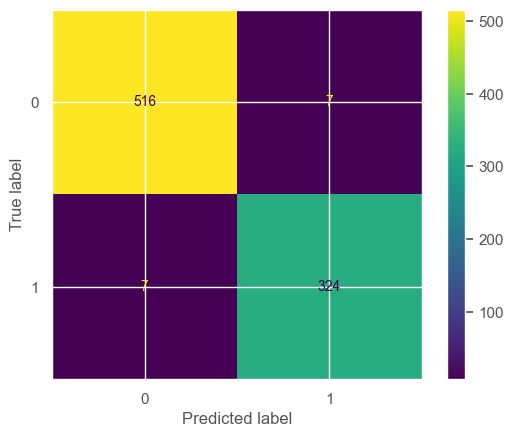

In [26]:
model_predictions, _, _, _, _ = predict_using_model(rf_classifier, train_x, train_y, test_x, test_y)
ConfusionMatrixDisplay(confusion_matrix(test_y, model_predictions)).plot()

# Conclusion
After using multiple classifier we can see that Random Forest and XGB classification algorithms are giving the best results on using the given datasets.

Both of these algorithm gave an accuracy greater than 98.5% score. However the accuracy score have been consistent with Random Forest and we will be considering Random Forest classifier to be used over this dataset to get the best results